# CC DD DE in 2 near time overlap
CC DD DE genes, which is DE gene in at least two continuous time point

In [1]:
library(UpSetR)
library(readxl)
library(ggplot2)
library(clusterProfiler)
library(pheatmap)
library(tidyr)



clusterProfiler v3.16.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [2]:
setwd("~/Documents/phd/tomato_metabolic/upsetR/DD:D")

In [3]:
CC_DE_atLeast_2Point <- read.table("../CC:C/overlap_genes2.txt", sep="\t")
DD_DE_atLeast_2Point <- read.table("DD_overlap_genes2.txt", sep="\t")

# 1 合并基因集合

In [4]:
length(rownames(CC_DE_atLeast_2Point))
length(rownames(DD_DE_atLeast_2Point))
CC_DD_DE_genes <- unique(c(rownames(CC_DE_atLeast_2Point), rownames(DD_DE_atLeast_2Point)))
length(CC_DD_DE_genes)

CC_DE_atLeast_2Point$rownames <- rownames(CC_DE_atLeast_2Point)
DD_DE_atLeast_2Point$rownames <- rownames(DD_DE_atLeast_2Point)

[1] 3289

[1] 3426

[1] 4380

In [5]:
library(plyr)


Warning message:
“package ‘plyr’ was built under R version 4.0.5”

Attaching package: ‘plyr’


The following objects are masked from ‘package:clusterProfiler’:

    arrange, mutate, rename, summarise




In [6]:
CCDD_DE_atLeast_2Point <- merge(CC_DE_atLeast_2Point, DD_DE_atLeast_2Point, by="rownames", all=T)
rownames(CCDD_DE_atLeast_2Point) <- CCDD_DE_atLeast_2Point$rownames
CCDD_DE_atLeast_2Point <- subset(CCDD_DE_atLeast_2Point, select=-rownames)
CCDD_DE_atLeast_2Point[is.na(CCDD_DE_atLeast_2Point)] = 0


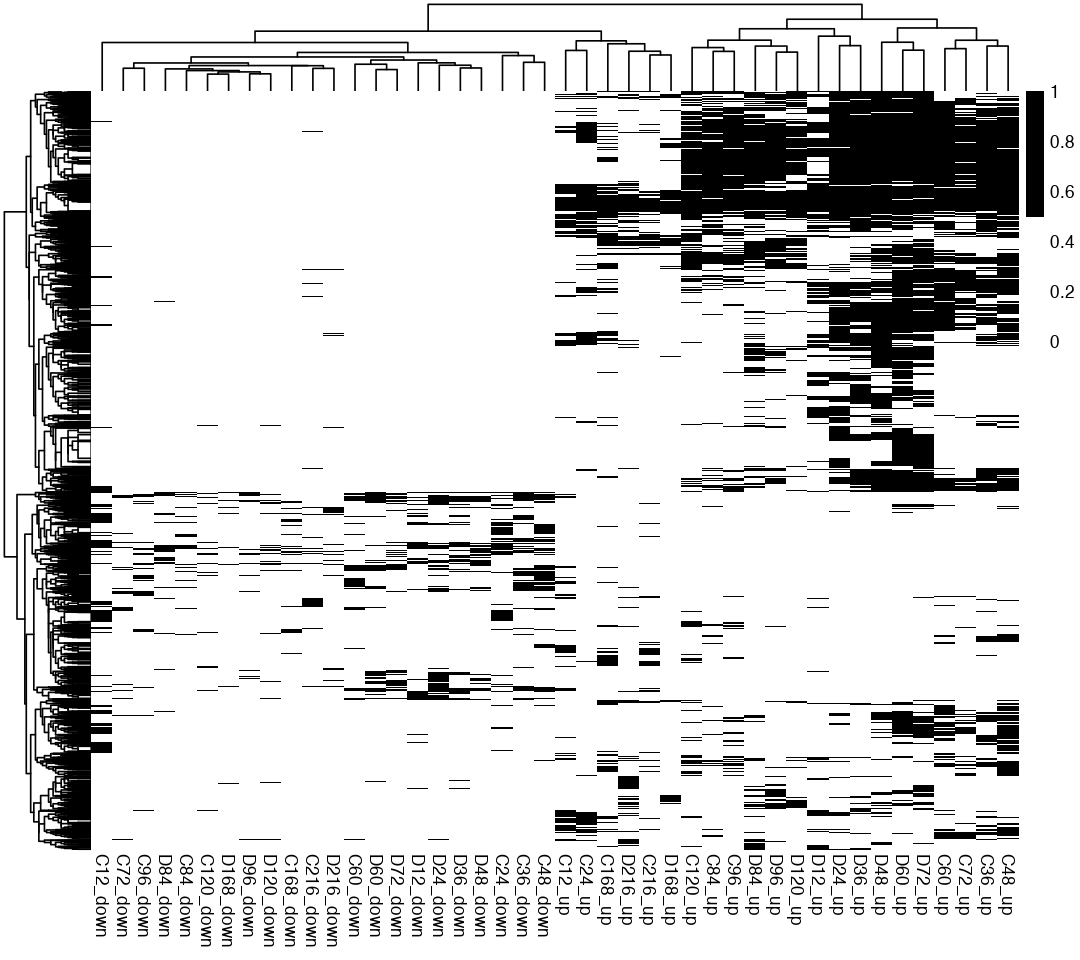

In [7]:
options(repr.plot.width=9, repr.plot.height=8)
pheatmap(CCDD_DE_atLeast_2Point, show_rownames=F, color=colorRampPalette(c("white", "black"))(2))

# 2 选择overlap的基因集合

In [8]:
CC_DD_overlap_DE_genes <- rownames(CC_DE_atLeast_2Point)[rownames(CC_DE_atLeast_2Point) %in% rownames(DD_DE_atLeast_2Point)]
length(CC_DD_overlap_DE_genes)

CCDD_overlapDE_atLeast_2Point <- cbind(CC_DE_atLeast_2Point[CC_DD_overlap_DE_genes,1:22], DD_DE_atLeast_2Point[CC_DD_overlap_DE_genes,1:22])




[1] 2335

In [20]:
write.csv(CCDD_overlapDE_atLeast_2Point, "CCDD_overlapDE_atLeast_2Point.csv", sep="\t", quote=FALSE)

Warning message in write.csv(CCDD_overlapDE_atLeast_2Point, "CCDD_overlapDE_atLeast_2Point.csv", :
“attempt to set 'sep' ignored”


In [74]:
sa_meta = data.frame(colnames(CCDD_overlapDE_atLeast_2Point))
colnames(sa_meta) <- c("sa_name")
rownames(sa_meta) <- sa_meta$sa_name
sa_meta <- extract(sa_meta, sa_name, into=c('Condition', 'HAG', 'DE'),
                  '([^0-9]+)(\\d+)_([^0-9]+)', convert=TRUE)


In [110]:
ann_colors = list(
    HAG = c("white", "navy"),
    Condition = c(C = "#07CCD2", D = "#E0CC71"),
    DE = c(up = "#DE425A", down = "#3A886C")
)

options(repr.plot.width=8, repr.plot.height=8)
p <- pheatmap(CCDD_overlapDE_atLeast_2Point, 
              cutree_col = 4,
              cutree_row = 5,
              show_rownames=F, 
              annotation_col=sa_meta,
              filename="CCDD_overlapDE_atLeast_2Point_heatmap.pdf", width=8,height=8,
              color=colorRampPalette(c("white", "black"))(2),
              annotation_colors = ann_colors, main = "CCDD_overlapDE_atLeast_2Point 2335 genes")
#color=colorRampPalette(c("#E5AB3E", "#6D236F"))(2))

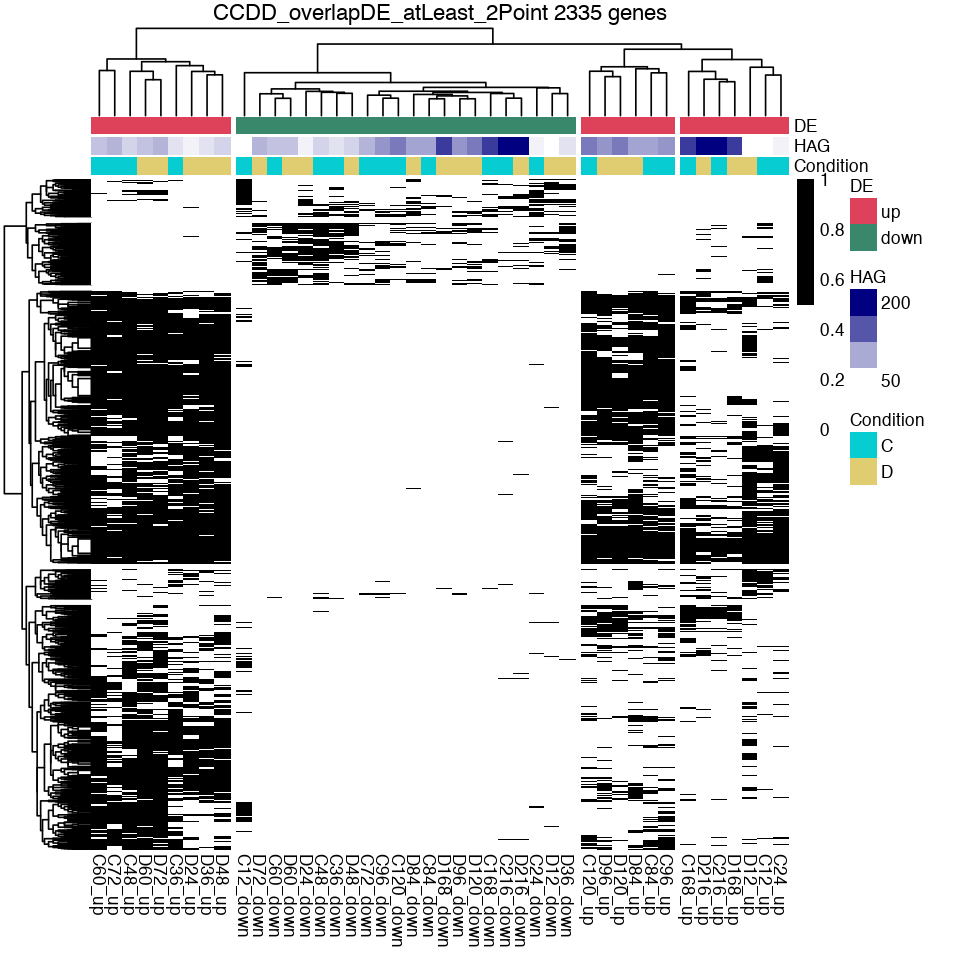

In [111]:
p

In [106]:
sa_meta_up <- sa_meta[sa_meta$DE=="up",]
sa_meta_up <- sa_meta_up[,-3]
CCDD_overlapDE_atLeast_2Point_up <- CCDD_overlapDE_atLeast_2Point[,rownames(sa_meta_up)]
dim(CCDD_overlapDE_atLeast_2Point_up)
CCDD_overlapDE_atLeast_2Point_up <- CCDD_overlapDE_atLeast_2Point_up[rowSums(CCDD_overlapDE_atLeast_2Point_up)>0,]
dim(CCDD_overlapDE_atLeast_2Point_up)

[1] 2335   22

[1] 2119   22

In [112]:
ann_colors = list(
    HAG = c("white", "navy"),
    Condition = c(C = "#07CCD2", D = "#E0CC71"),
    DE = c(up = "#DE425A", down = "#3A886C")
)

options(repr.plot.width=6, repr.plot.height=8)
p <- pheatmap(CCDD_overlapDE_atLeast_2Point_up, 
              cutree_col = 4,
              cutree_row = 5,
              show_rownames=F, 
              annotation_col=sa_meta_up,
              filename="CCDD_overlapDE_atLeast_2Point_heatmap_only_up.pdf", width=6,height=8,
              color=colorRampPalette(c("white", "black"))(2),
              annotation_colors = ann_colors, main = "CCDD_overlapDE_atLeast_2Point_only up 2119 genes")
#color=colorRampPalette(c("#E5AB3E", "#6D236F"))(2))
p

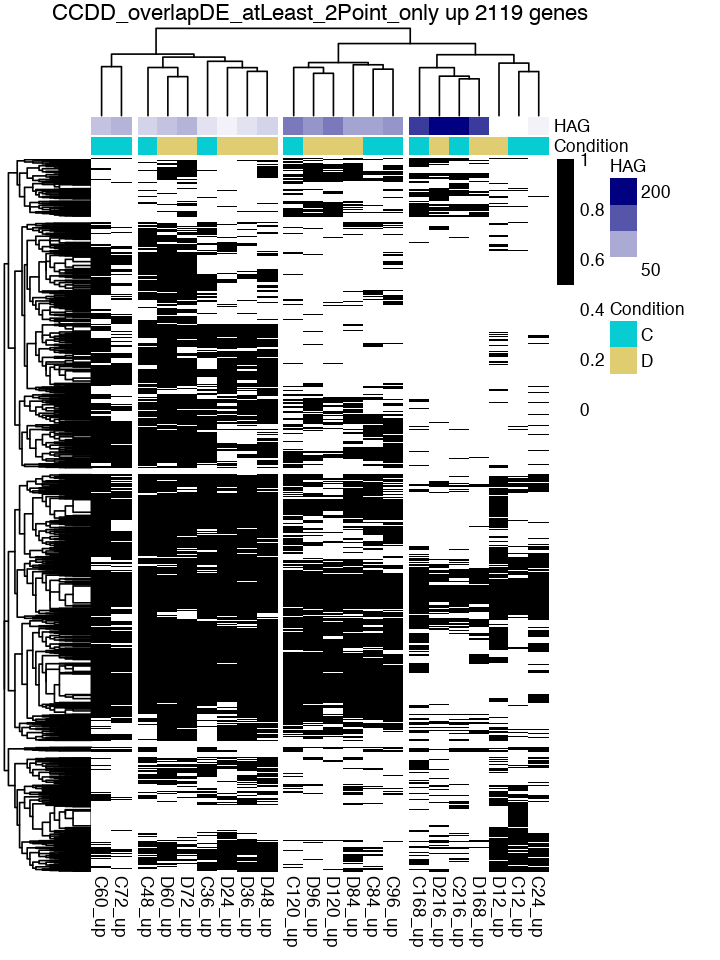

In [113]:
p

In [21]:
row_cluster <- cutree(p$tree_row, k=5)
newOrder <- CCDD_overlapDE_atLeast_2Point[p$tree_row$order,]
newOrder[,ncol(newOrder)+1]=row_cluster[match(rownames(newOrder), names(row_cluster))]
colnames(newOrder)[ncol(newOrder)]="Cluster"

In [22]:
newOrder_subset5 <- subset(newOrder, Cluster==5, select=-Cluster)

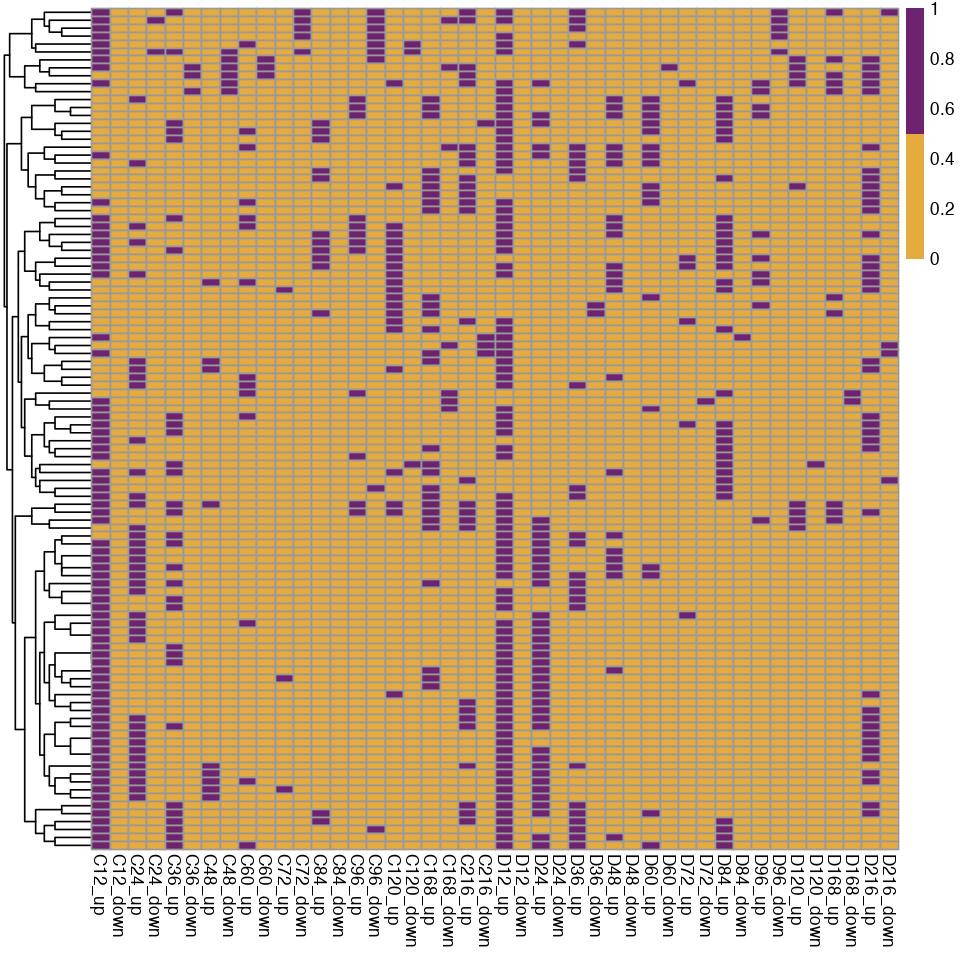

In [23]:
pheatmap(newOrder_subset5, 
         #cutree_col = 4,
         #cutree_row = 5,
         show_rownames=F, 
         cluster_cols=F,
         #filename="CCDD_overlapDE_atLeast_2Point_heatmap.pdf", width=8,height=8,
         color=colorRampPalette(c("#E5AB3E", "#6D236F"))(2))

In [73]:
dim(newOrder_subset5)

[1] 106  44

# read FCs
### DD


In [30]:
D12_allFC <- read_allFC_data(paste0(DDallFC_dir, "D12h_vs_DD12h.all.annot.xlsx"))

[1] 20950    34
[1] 20950     5


In [25]:
read_allFC_data <- function(file){
    data <- data.frame(read_excel(file))
    print(dim(data))
    data$abslog2FC <- abs(data$log2FoldChange)
    data<- subset(data, select=c("ID", "regulated", "log2FoldChange", "pvalue", "padj"))
    rownames(data) <- data$ID
    print(dim(data))
    return(data)
}

DDallFC_dir <- "/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/DD:D/全部基因/"
D24_allFC <- read_allFC_data(paste0(DDallFC_dir, "D24h_vs_DD24h.all.annot.xlsx"))
D36_allFC <- read_allFC_data(paste0(DDallFC_dir, "D36h_vs_DD36h.all.annot.xlsx"))
D48_allFC <- read_allFC_data(paste0(DDallFC_dir, "D48h_vs_DD48h.all.annot.xlsx"))
D60_allFC <- read_allFC_data(paste0(DDallFC_dir, "D60h_vs_DD60h.all.annot.xlsx"))
D72_allFC <- read_allFC_data(paste0(DDallFC_dir, "D72h_vs_DD72h.all.annot.xlsx"))
D84_allFC <- read_allFC_data(paste0(DDallFC_dir, "D84h_vs_DD84h.all.annot.xlsx"))
D96_allFC <- read_allFC_data(paste0(DDallFC_dir, "D96h_vs_DD96h.all.annot.xlsx"))
D120_allFC <- read_allFC_data(paste0(DDallFC_dir, "D120h_vs_DD120h.all.annot.xlsx"))
D168_allFC <- read_allFC_data(paste0(DDallFC_dir, "D168h_vs_DD168h.all.annot.xlsx"))
D216_allFC <- read_allFC_data(paste0(DDallFC_dir, "D216h_vs_DD216h.all.annot.xlsx"))

[1] 20704    34
[1] 20704     5
[1] 20867    34
[1] 20867     5
[1] 20765    34
[1] 20765     5
[1] 20851    34
[1] 20851     5
[1] 20855    34
[1] 20855     5
[1] 21220    34
[1] 21220     5
[1] 21100    34
[1] 21100     5
[1] 21328    34
[1] 21328     5
[1] 20800    34
[1] 20800     5
[1] 21200    34
[1] 21200     5


In [26]:
CCallFC_dir <- "/Users/yuanzan/Documents/phd/tomato_metabolic/data/番茄转录组数据分析/CC:C/全部基因/"
C12_allFC <- read_allFC_data(paste0(CCallFC_dir, "C12h_vs_CC12h.all.annot.xlsx"))
C24_allFC <- read_allFC_data(paste0(CCallFC_dir, "C24h_vs_CC24h.all.annot.xlsx"))
C36_allFC <- read_allFC_data(paste0(CCallFC_dir, "C36h_vs_CC36h.all.annot.xlsx"))
C48_allFC <- read_allFC_data(paste0(CCallFC_dir, "C48h_vs_CC48h.all.annot.xlsx"))
C60_allFC <- read_allFC_data(paste0(CCallFC_dir, "C60h_vs_CC60h.all.annot.xlsx"))
C72_allFC <- read_allFC_data(paste0(CCallFC_dir, "C72h_vs_CC72h.all.annot.xlsx"))
C84_allFC <- read_allFC_data(paste0(CCallFC_dir, "C84h_vs_CC84h.all.annot.xlsx"))
C96_allFC <- read_allFC_data(paste0(CCallFC_dir, "C96h_vs_CC96h.all.annot.xlsx"))
C120_allFC <- read_allFC_data(paste0(CCallFC_dir, "C120h_vs_CC120h.all.annot.xlsx"))
C168_allFC <- read_allFC_data(paste0(CCallFC_dir, "C168h_vs_CC168h.all.annot.xlsx"))
C216_allFC <- read_allFC_data(paste0(CCallFC_dir, "C216h_vs_CC216h.all.annot.xlsx"))

[1] 20869    34
[1] 20869     5
[1] 20527    34
[1] 20527     5
[1] 20467    34
[1] 20467     5
[1] 20218    34
[1] 20218     5
[1] 20211    34
[1] 20211     5
[1] 19954    34
[1] 19954     5
[1] 20690    34
[1] 20690     5
[1] 20500    34
[1] 20500     5
[1] 20966    34
[1] 20966     5
[1] 20950    34
[1] 20950     5
[1] 20771    34
[1] 20771     5


In [27]:
CCDD_id_forMfuzz <- rownames(CCDD_overlapDE_atLeast_2Point)

In [28]:
CC_FC_formfuzz <- cbind(C12_allFC[CCDD_id_forMfuzz, c("log2FoldChange")], 
      C24_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C36_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C48_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C60_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C72_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C84_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C96_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C120_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C168_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      C216_allFC[CCDD_id_forMfuzz, c("log2FoldChange")])

In [31]:
DD_FC_formfuzz <- cbind(D12_allFC[CCDD_id_forMfuzz, c("log2FoldChange")], 
      D24_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D36_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D48_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D60_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D72_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D84_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D96_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D120_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D168_allFC[CCDD_id_forMfuzz, c("log2FoldChange")],
      D216_allFC[CCDD_id_forMfuzz, c("log2FoldChange")])

In [32]:
library(Mfuzz)
RNA_mfuzz <- function(data, n=10){
    dat <- new('ExpressionSet', exprs=as.matrix(data))
    dat <- filter.NA(dat, thres = 0.25)
    dat <- fill.NA(dat, mode="mean")
    dat <- filter.std(dat, min.std=0)
    dat <- standardise(dat)
    
    m <- mestimate(dat)
    print(m)
    set.seed(2022)
    cl <- mfuzz(dat, c=n, m=m)
    return(list(cl=cl, dat=dat))
}

options(repr.plot.width=6, repr.plot.height=5)


Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie

In [33]:
rownames(CC_FC_formfuzz) <- CCDD_id_forMfuzz
colnames(CC_FC_formfuzz) <- c("CC12", "CC24", "CC36", "CC48", "CC60", "CC72", "CC84", "CC96", "CC120", "CC168", "CC216")
CC_FC_formfuzz[is.na(CC_FC_formfuzz)] <- 0

rownames(DD_FC_formfuzz) <- CCDD_id_forMfuzz
colnames(DD_FC_formfuzz) <- c("DD12", "DD24", "DD36", "DD48", "DD60", "DD72", "DD84", "DD96", "DD120", "DD168", "DD216")
DD_FC_formfuzz[is.na(DD_FC_formfuzz)] <- 0


0 genes excluded.
0 genes excluded.
[1] 1.276156


[1] 315 723 408 225 196 239 229

0 genes excluded.
0 genes excluded.


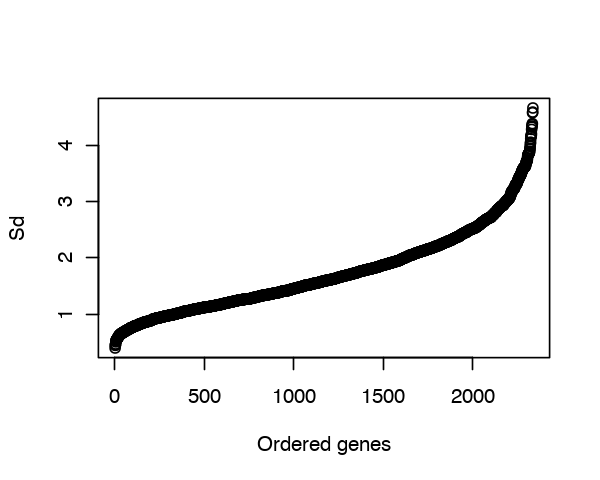

[1] 1.276156


[1] 223 562 345 214 318 218 455

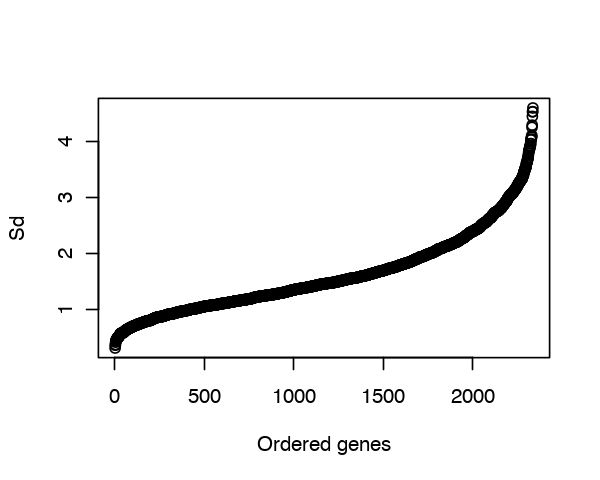

In [34]:
options(repr.plot.width=5, repr.plot.height=4)
cluster_n = 7

CC_mfuzz <- RNA_mfuzz(CC_FC_formfuzz, n=cluster_n)
# 查看每个cluster中的基因个数
CC_mfuzz$cl$size

DD_mfuzz <- RNA_mfuzz(DD_FC_formfuzz, n=cluster_n)
DD_mfuzz$cl$size

Loading required package: viridisLite



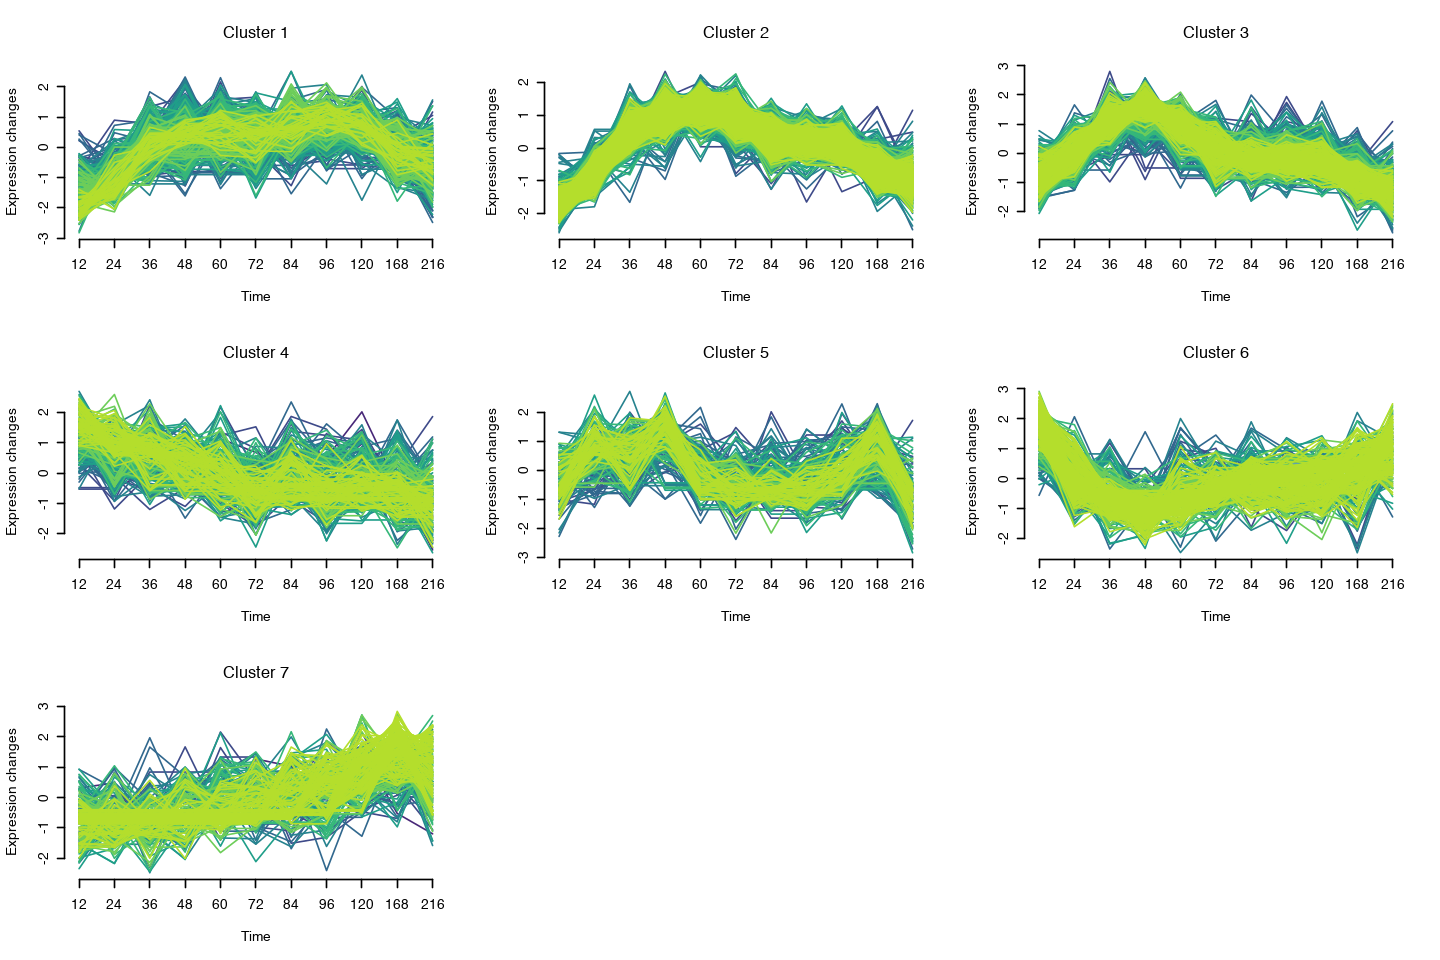

In [35]:
library(viridis)
color.2 <- colorRampPalette(rev(c("#d50000", "#ffea00", "blue")))(1000)

options(repr.plot.width=12, repr.plot.height=8)


#pdf("CC_mfuzz.pdf",width = 12,height = 8)
mfuzz.plot(CC_mfuzz$dat, CC_mfuzz$cl, mfrow=c(3,3), new.window= FALSE,
           time.labels=c("12","24","36", "48", "60", "72", "84", "96", "120", "168", "216"),# 设置横轴标签
           colo = viridis(10)) #颜色
#dev.off()

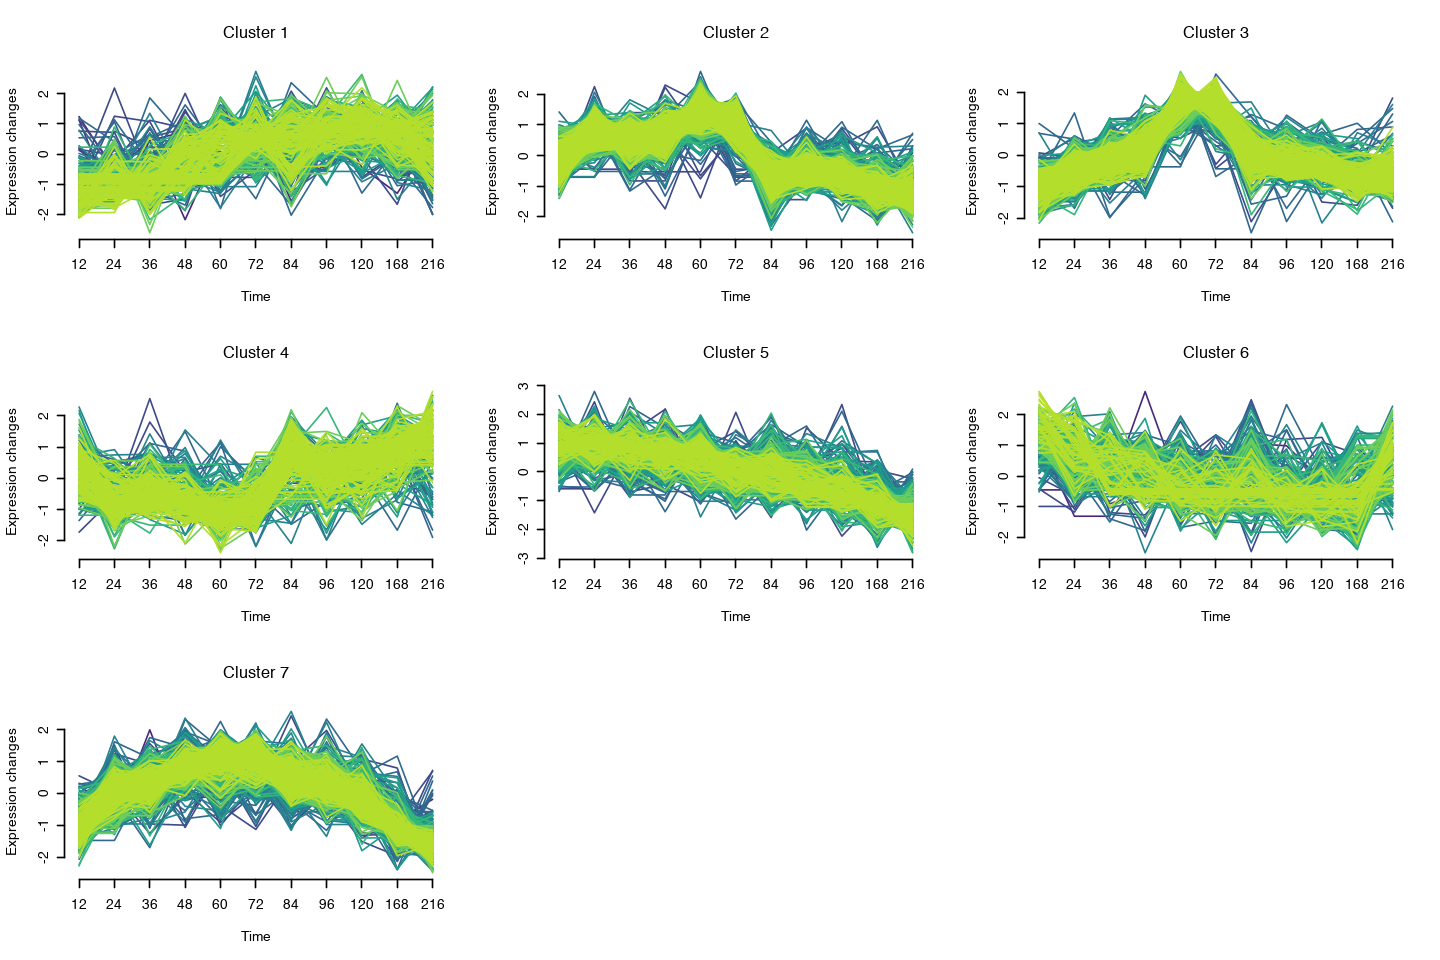

In [36]:
#pdf("DD_mfuzz.pdf",width = 12,height = 8)
mfuzz.plot(DD_mfuzz$dat, DD_mfuzz$cl, mfrow=c(3,3), new.window= FALSE,
           time.labels=c("12","24","36", "48", "60", "72", "84", "96", "120", "168", "216"),# 设置横轴标签
           colo = viridis(10)) #颜色
#dev.off()

In [37]:
CC_gene_clusters <- data.frame(CC_mfuzz$cl$cluster)
colnames(CC_gene_clusters) <- c("CC_cluster")

DD_gene_clusters <- data.frame(DD_mfuzz$cl$cluster)
colnames(DD_gene_clusters) <- c("DD_cluster")

CC_DD_gene_clusters <- cbind(CC_gene_clusters, DD_gene_clusters)


In [38]:
library(dplyr)

CC_DD_gene_clusters_overlap_count <- CC_DD_gene_clusters %>%
    group_by(CC_cluster, DD_cluster) %>% summarise(count_sales = n())

CC_DD_gene_clusters_overlap_count$CC_cluster <- paste0("C", CC_DD_gene_clusters_overlap_count$CC_cluster)
CC_DD_gene_clusters_overlap_count$DD_cluster <- paste0("D", CC_DD_gene_clusters_overlap_count$DD_cluster)

head(CC_DD_gene_clusters_overlap_count,2)


Attaching package: ‘dplyr’


The following object is masked from ‘package:widgetTools’:

    funs


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'CC_cluster'. You can override using the `.groups` argument.


CC_cluster,DD_cluster,count_sales
<chr>,<chr>,<int>
C1,D1,51
C1,D2,41


In [39]:
library("tidyr")

CC_DD_gene_clusters_overlap_count_reshape <- spread(CC_DD_gene_clusters_overlap_count,
                                                    key="CC_cluster",
                                                    value="count_sales")

CC_DD_gene_clusters_overlap_count_reshape[is.na(CC_DD_gene_clusters_overlap_count_reshape)] = 0
rownames <- CC_DD_gene_clusters_overlap_count_reshape$DD_cluster
CC_DD_gene_clusters_overlap_count_reshape <- data.frame(subset(CC_DD_gene_clusters_overlap_count_reshape, select =-DD_cluster))
rownames(CC_DD_gene_clusters_overlap_count_reshape) <- rownames


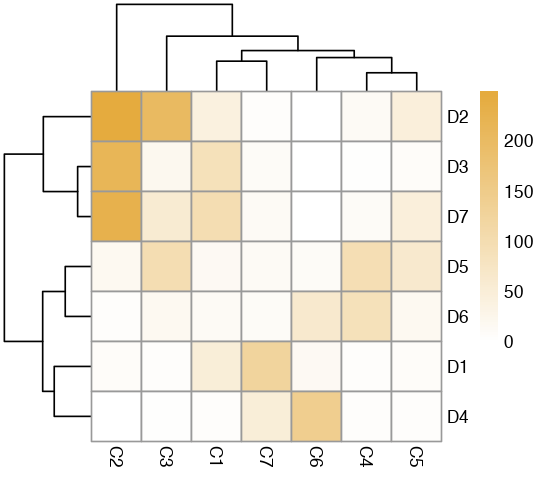

In [40]:
options(repr.plot.width=4.5, repr.plot.height=4)
pheatmap(CC_DD_gene_clusters_overlap_count_reshape, 
         color=colorRampPalette(c("white", "#E5AB3E"))(100)
         #filename="CCDD_cluster_overlap_gene_num.pdf", width=4.5,height=4,
        )

In [46]:
CC_DD_gene_clusters_overlap_count_reshape

,C1,C2,C3,C4,C5,C6,C7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
D1,51,8,5,7,9,17,126
D2,41,249,204,14,46,2,6
D3,88,215,20,3,8,1,10
D4,7,0,4,5,5,142,51
D5,16,19,98,97,64,11,13
D6,14,5,18,89,18,64,10
D7,98,227,59,10,46,2,13


In [45]:
saveRDS(CC_mfuzz, "CC_mfuzz.rds")
saveRDS(DD_mfuzz, "DD_mfuzz.rds")

In [41]:
merge_CD_mat <- cbind(CC_FC_formfuzz, DD_FC_formfuzz)

In [343]:
saveRDS(merge_CD_mat, "merge_CD_mat.rds")

In [344]:
library(dyno)
library(tidyverse)
library(Matrix)


dataset <- wrap_expression(
  counts = t(merge_CD_mat),
  expression = t(merge_CD_mat)
)

dataset <- add_prior_information(
  dataset,
  start_id = "CC12"
)


dataset <- add_grouping(
   dataset,
   substring(colnames(merge_CD_mat), 1, 2)
)

dataset$HAG <- str_sub(colnames(merge_CD_mat), 3, -1)

methods_selected <- c("slingshot")

model_slingshot <- infer_trajectory(dataset, methods_selected[1])



Loading required package: dynfeature

Loading required package: dynguidelines

Loading required package: dynmethods

Loading required package: dynplot

Loading required package: dynwrap

── Attaching packages ─────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()         masks plyr::arrange(), clusterProfiler::arrange()
✖ readr::col_factor()      masks scales::col_factor()
✖ IRanges::collapse()      masks dplyr::collapse()
✖ dplyr::combine()         masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()         masks plyr::compact()
✖ dplyr::count()           masks plyr::count()
✖ IRanges::desc()          masks dplyr::desc(), plyr::desc()
✖ purrr::discard()         masks scales::discard()
✖ S4Vectors::expand()      

v1.0.3: Pulling from dynverse/ti_slingshot
a4d8138d0f6b: Pulling fs layer
fb232e1cbf74: Pulling fs layer
53a696448921: Pulling fs layer
0a98bf8e346b: Pulling fs layer
80070ed7cf88: Pulling fs layer
3dda0c19343b: Pulling fs layer
c8dedce96c17: Pulling fs layer
33199d4ff47f: Pulling fs layer
7d44151ac2da: Pulling fs layer
71c13904cc33: Pulling fs layer
a03a650d0366: Pulling fs layer
d0e24af2427d: Pulling fs layer
509c796290f5: Pulling fs layer
fc7b41c3606c: Pulling fs layer
a0885e753793: Pulling fs layer
0a98bf8e346b: Waiting
80070ed7cf88: Waiting
3dda0c19343b: Waiting
33199d4ff47f: Waiting
c8dedce96c17: Waiting
7d44151ac2da: Waiting
71c13904cc33: Waiting
a03a650d0366: Waiting
d0e24af2427d: Waiting
509c796290f5: Waiting
fc7b41c3606c: Waiting
a0885e753793: Waiting
a4d8138d0f6b: Verifying Checksum
a4d8138d0f6b: Download complete
0a98bf8e346b: Verifying Checksum
0a98bf8e346b: Download complete
80070ed7cf88: Verifying Checksum
80070ed7cf88: Download complete
3dda0c19343b: Verifying Checksum


Loading required namespace: hdf5r



In [359]:
saveRDS(model_slingshot, "model_slingshot.rds")

Coloring by grouping



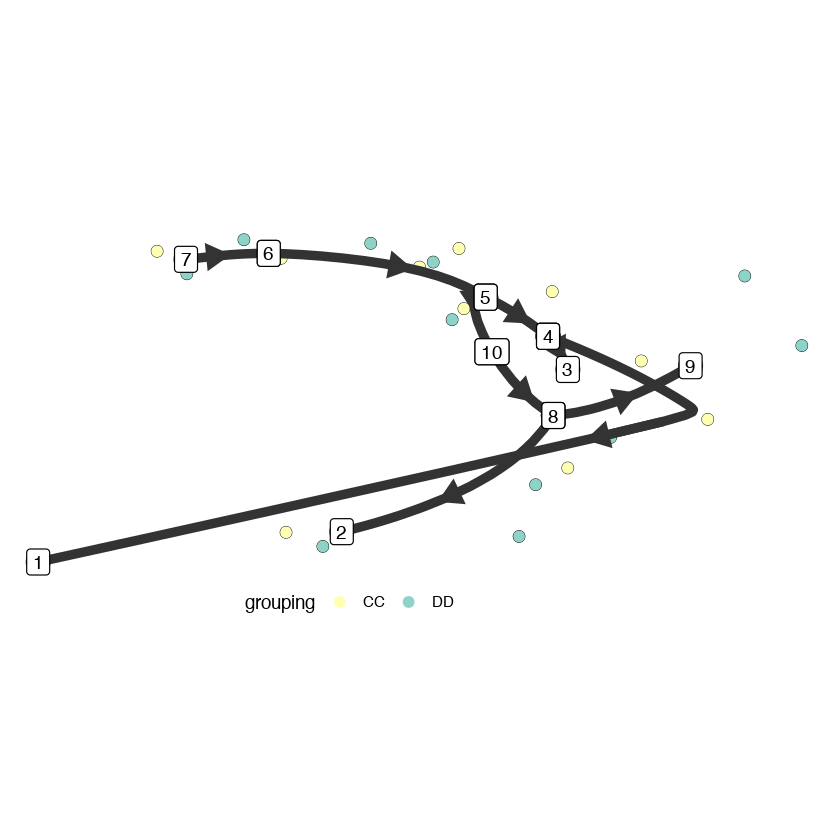

In [346]:
#model <- model_slingshot %>% add_dimred(dyndimred::dimred_mds, expression_source = dataset$expression)

options(repr.plot.width=7, repr.plot.height=7)

plot_dimred(
  model_slingshot, 
  expression_source = dataset$expression, 
  grouping = dataset$grouping,
  label_milestones = TRUE
)

Coloring by grouping



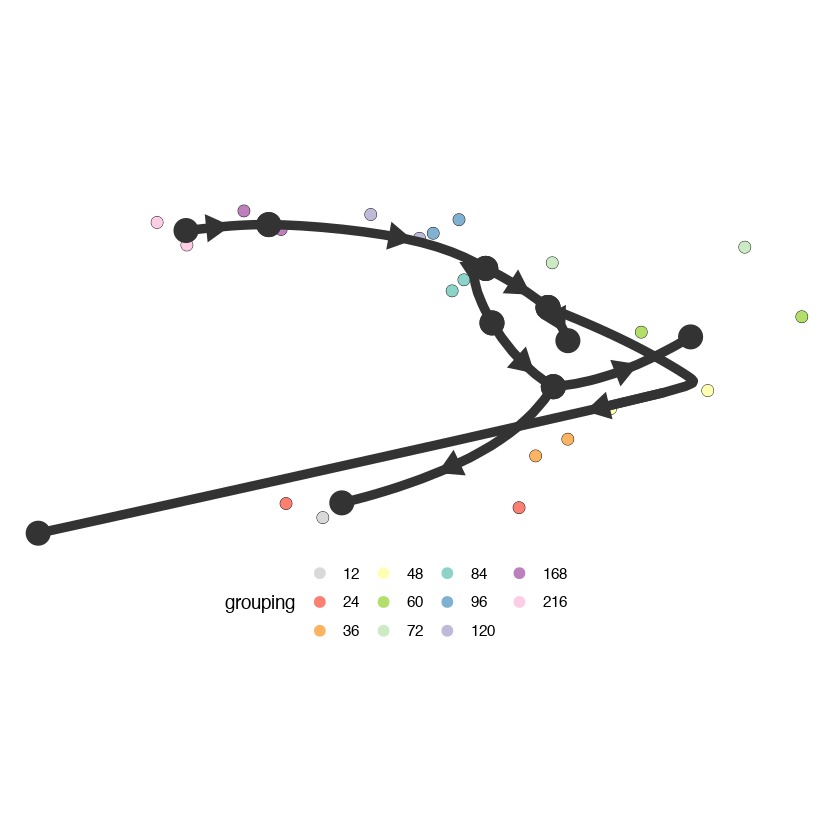

In [347]:
options(repr.plot.width=7, repr.plot.height=7)

plot_dimred(
  model_slingshot, 
  expression_source = dataset$expression, 
  grouping = dataset$HAG,
  label_milestones = FALSE
)

root cell or milestone not provided, trying first outgoing milestone_id

Using '7' as root

Coloring by milestone

Using milestone_percentages from trajectory



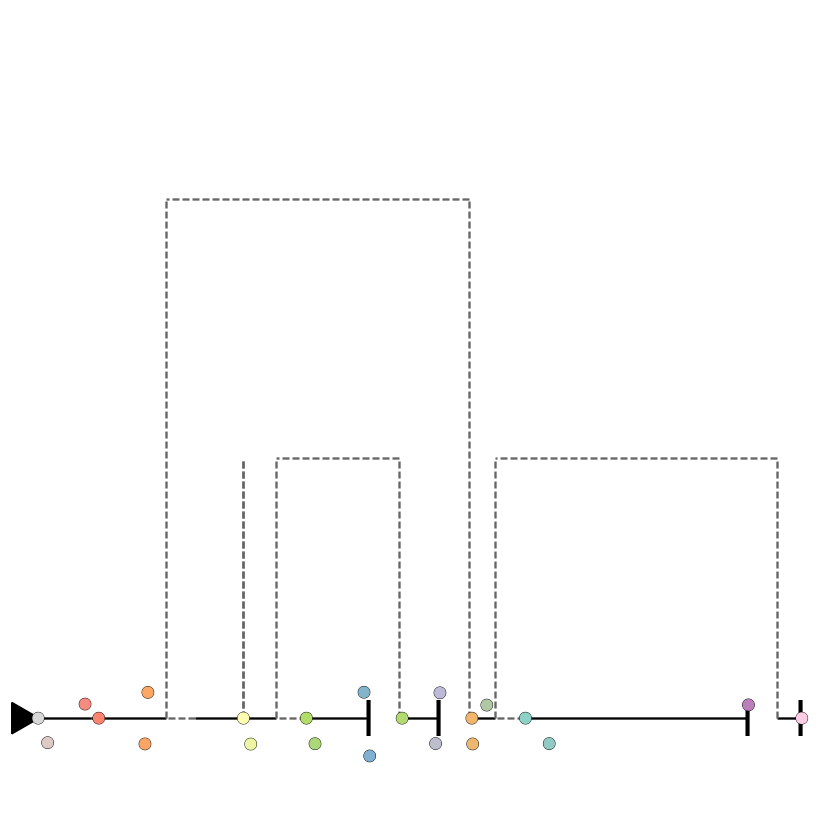

In [348]:
plot_onedim(model_slingshot)

root cell or milestone not provided, trying first outgoing milestone_id

Using '7' as root

Coloring by milestone

Using milestone_percentages from trajectory

Warning message:
“Using alpha for a discrete variable is not advised.”


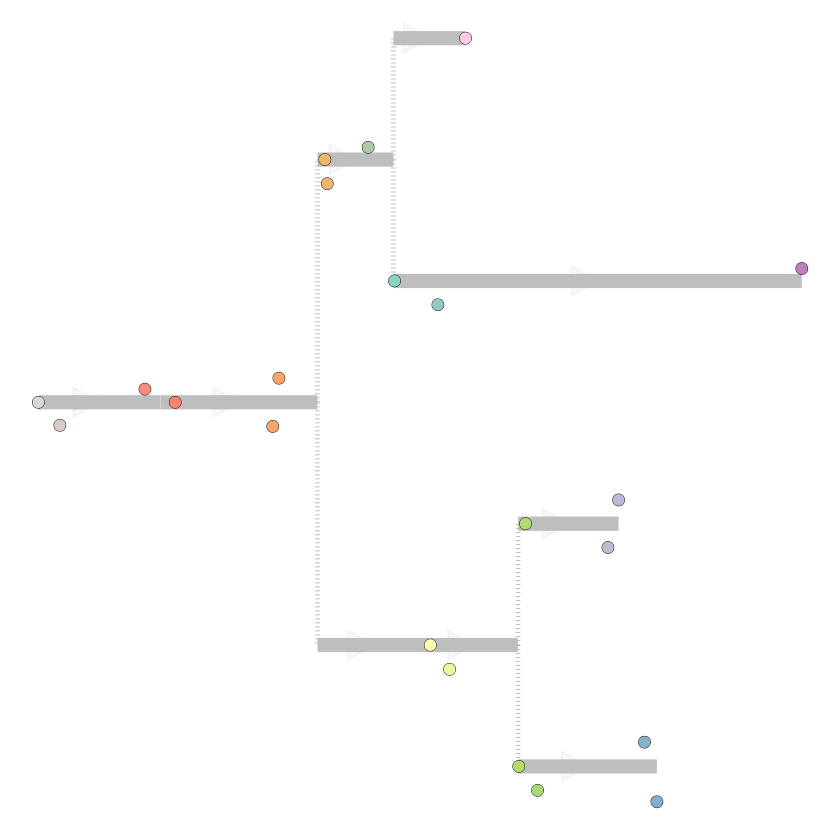

In [349]:
plot_dendro(model_slingshot)

Coloring by milestone

Using milestone_percentages from trajectory



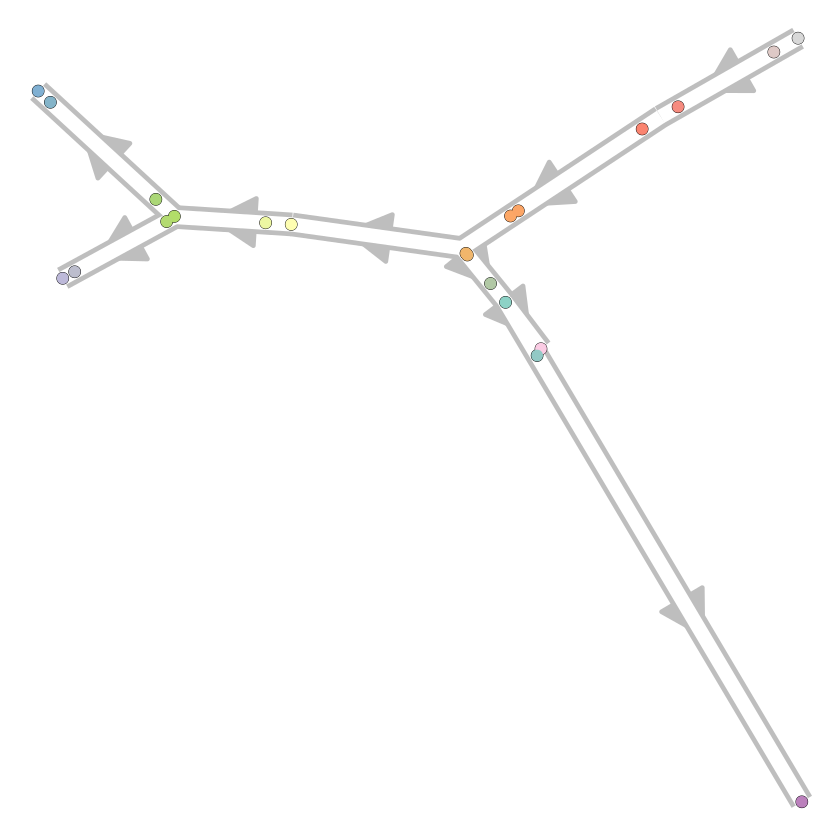

In [350]:
plot_graph(model_slingshot)

root cell or milestone not provided, trying first outgoing milestone_id

Using '7' as root

Coloring by grouping



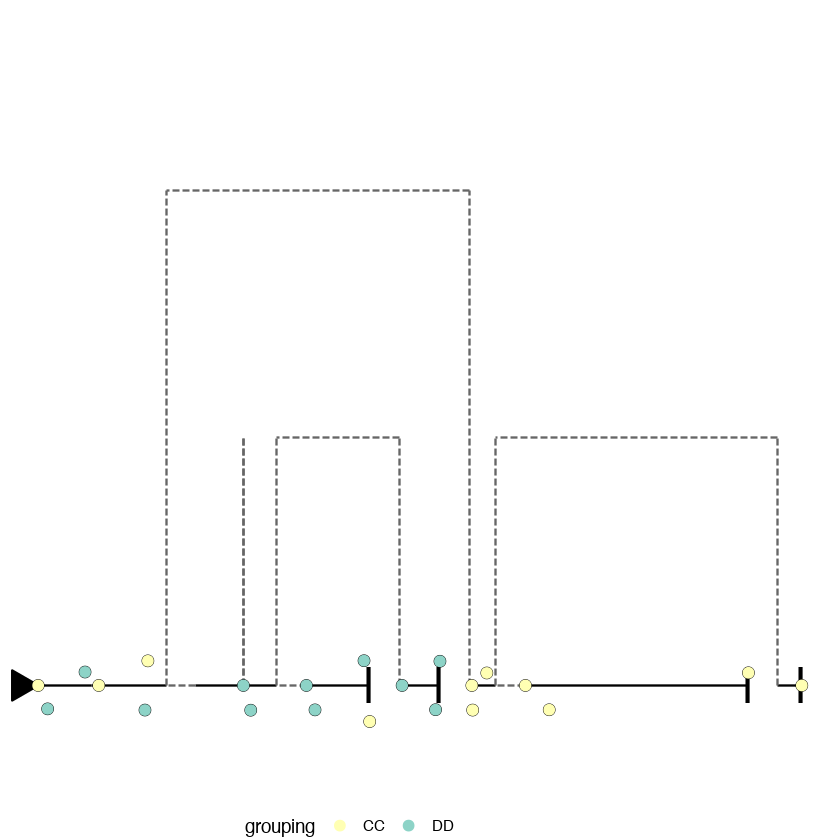

In [356]:
grouping <- dataset$grouping
plot_onedim(model_slingshot, grouping = grouping)

In [358]:
#plot_heatmap(model_slingshot)

# annotation

In [171]:
library(AnnotationHub) 
library(biomaRt)

print(1)
hub <- AnnotationHub() #建立AnnotationHub对象（视人品，网不行加载不了）
print(2)
# unique(hub$species) #查看AnonotationHub里面物种
hub$species[which(hub$species=="Solanum")] #看AnonotationHub里是否包含想要的物种
# Solanum是番茄的拉丁名
query(hub, "Solanum")  #查看该物种信息
hub[hub$species=="Solanum" & hub$rdataclass == "OrgDb"] #OrgDb属于rdataclass中，因此查看下该物种有没有OrgDb
Solanum.OrgDb <- hub[["AH80808"]]#AH59087是番茄对应的编号


[1] 1


snapshotDate(): 2020-04-27



[1] 2


character(0)

AnnotationHub with 8 records
# snapshotDate(): 2020-04-27
# $dataprovider: ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/, Inparanoid8
# $species: Solanum tuberosum, Solanum lycopersicum, Solanum pennellii, Sola...
# $rdataclass: OrgDb, Inparanoid8Db
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH10593"]]' 

            title                                             
  AH10593 | hom.Solanum_lycopersicum.inp8.sqlite              
  AH10606 | hom.Solanum_tuberosum.inp8.sqlite                 
  AH80691 | org.Solanum_pennelli.eg.sqlite                    
  AH80692 | org.Solanum_pennellii.eg.sqlite                   
  AH80747 | org.Solanum_tuberosum.eg.sqlite                   
  AH80807 | org.Solanum_esculentum.eg.sqlite                  
  AH80808 | org.Solanum_lycopersicum.eg.sqlite                
  AH80809 | org.Solanum_lycopersi

AnnotationHub with 0 records
# snapshotDate(): 2020-04-27

downloading 1 resources

retrieving 1 resource

loading from cache

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:tidyr’:

    expand


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:plyr’:

    rename


The following object is masked from ‘package:clusterProfiler’:

    rename


The following object is masked from ‘package:base’:

    expand.grid



Attaching package: ‘IRanges’


The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice


The following object is masked from ‘package:plyr’:

    desc


The following object is masked from ‘package:clusterProfiler’:

    slice



Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked fr

In [172]:
hub[hub$species=="Solanum" & hub$rdataclass == "OrgDb"]

AnnotationHub with 0 records
# snapshotDate(): 2020-04-27

In [173]:
geneIDTransForm <- read.table("~/Documents/phd/tomato_metabolic/geneIDTransForm/mart_export.txt", sep="\t", header=TRUE)

In [174]:
SYMBOLE2ID <- function(symbols){
    ids <- bitr(symbols,
                fromType = "SYMBOL",
                toType =c('ENTREZID') ,
                OrgDb = Solanum.OrgDb)
    return(ids)
}
    
#mfuzz_cluster1_genes <- names(fd2_mfuzz$cl$cluster[fd2_mfuzz$cl$cluster == 1])
#mfuzz_cluster1_genes_Eid <- SYMBOLE2ID(c("XM_004249622.3"))

id2entrezID <- function(ids){
    #df <- geneIDTransForm[geneIDTransForm$NCBI.gene..formerly.Entrezgene..ID,]
    Entreids <- unique(geneIDTransForm[geneIDTransForm$Gene.stable.ID %in% ids,]$NCBI.gene..formerly.Entrezgene..ID)
    return(Entreids)
}

In [175]:
C1_Entrez <- id2entrezID(names(CC_mfuzz$cl$cluster[CC_mfuzz$cl$cluster == 1]))
C2_Entrez <- id2entrezID(names(CC_mfuzz$cl$cluster[CC_mfuzz$cl$cluster == 2]))
C3_Entrez <- id2entrezID(names(CC_mfuzz$cl$cluster[CC_mfuzz$cl$cluster == 3]))

D2_Entrez <- id2entrezID(names(DD_mfuzz$cl$cluster[DD_mfuzz$cl$cluster == 2]))
D3_Entrez <- id2entrezID(names(DD_mfuzz$cl$cluster[DD_mfuzz$cl$cluster == 3]))
D7_Entrez <- id2entrezID(names(DD_mfuzz$cl$cluster[DD_mfuzz$cl$cluster == 7]))

In [218]:
C4_Entrez <- id2entrezID(names(CC_mfuzz$cl$cluster[CC_mfuzz$cl$cluster == 4]))
C5_Entrez <- id2entrezID(names(CC_mfuzz$cl$cluster[CC_mfuzz$cl$cluster == 5]))
C6_Entrez <- id2entrezID(names(CC_mfuzz$cl$cluster[CC_mfuzz$cl$cluster == 6]))
C7_Entrez <- id2entrezID(names(CC_mfuzz$cl$cluster[CC_mfuzz$cl$cluster == 7]))

D1_Entrez <- id2entrezID(names(DD_mfuzz$cl$cluster[DD_mfuzz$cl$cluster == 1]))
D4_Entrez <- id2entrezID(names(DD_mfuzz$cl$cluster[DD_mfuzz$cl$cluster == 4]))
D5_Entrez <- id2entrezID(names(DD_mfuzz$cl$cluster[DD_mfuzz$cl$cluster == 5]))
D6_Entrez <- id2entrezID(names(DD_mfuzz$cl$cluster[DD_mfuzz$cl$cluster == 6]))

In [176]:
C1_erich.go = enrichGO(gene = C1_Entrez,
                       OrgDb = Solanum.OrgDb,
                       keyType = "ENTREZID",
                       ont = "all",
                       pvalueCutoff = 1,
                       qvalueCutoff = 1)

C2_erich.go = enrichGO(gene = C2_Entrez,
                       OrgDb = Solanum.OrgDb,
                       keyType = "ENTREZID",
                       ont = "all",
                       pvalueCutoff = 1,
                       qvalueCutoff = 1)

C3_erich.go = enrichGO(gene = C3_Entrez,
                       OrgDb = Solanum.OrgDb,
                       keyType = "ENTREZID",
                       ont = "all",
                       pvalueCutoff = 1,
                       qvalueCutoff = 1)

D2_erich.go = enrichGO(gene = D2_Entrez,
                       OrgDb = Solanum.OrgDb,
                       keyType = "ENTREZID",
                       ont = "all",
                       pvalueCutoff = 1,
                       qvalueCutoff = 1)

D3_erich.go = enrichGO(gene = D3_Entrez,
                       OrgDb = Solanum.OrgDb,
                       keyType = "ENTREZID",
                       ont = "all",
                       pvalueCutoff = 1,
                       qvalueCutoff = 1)

D7_erich.go = enrichGO(gene = D7_Entrez,
                       OrgDb = Solanum.OrgDb,
                       keyType = "ENTREZID",
                       ont = "all",
                       pvalueCutoff = 1,
                       qvalueCutoff = 1)

# compare cluster

In [293]:
C1_Entrez = C1_Entrez[is.na(C1_Entrez)==FALSE]
C2_Entrez = C2_Entrez[is.na(C2_Entrez)==FALSE]
C3_Entrez = C3_Entrez[is.na(C3_Entrez)==FALSE]
C4_Entrez = C4_Entrez[is.na(C4_Entrez)==FALSE]
C5_Entrez = C5_Entrez[is.na(C5_Entrez)==FALSE]
C6_Entrez = C6_Entrez[is.na(C6_Entrez)==FALSE]
C7_Entrez = C7_Entrez[is.na(C7_Entrez)==FALSE]

D1_Entrez = D1_Entrez[is.na(D1_Entrez)==FALSE]
D2_Entrez = D2_Entrez[is.na(D2_Entrez)==FALSE]
D3_Entrez = D3_Entrez[is.na(D3_Entrez)==FALSE]
D4_Entrez = D4_Entrez[is.na(D4_Entrez)==FALSE]
D5_Entrez = D5_Entrez[is.na(D5_Entrez)==FALSE]
D6_Entrez = D6_Entrez[is.na(D6_Entrez)==FALSE]
D7_Entrez = D7_Entrez[is.na(D7_Entrez)==FALSE]

cmp_set = list(C1=C1_Entrez, C2=C2_Entrez, C3=C3_Entrez, C4=C4_Entrez, C5=C5_Entrez, C6=C6_Entrez, C7=C7_Entrez,
               D1=D1_Entrez, D2=D2_Entrez, D3=D3_Entrez, D4=D4_Entrez, D5=D2_Entrez, D6=D6_Entrez,  D7=D7_Entrez)  # 合并两个数据集，并转换为列表

cmp_kegg <- compareCluster(cmp_set, fun="enrichKEGG", organism="sly", pvalueCutoff=1, pAdjustMethod = "BH", qvalueCutoff=1) 


In [316]:

cmp_go <- compareCluster(cmp_set, fun="enrichGO", 
                         OrgDb = Solanum.OrgDb,
                         keyType = "ENTREZID",
                         ont = "all",
                         pvalueCutoff =1,
                         qvalueCutoff = 1) 


cmp_kegg@compareClusterResult[rownames(subset(cmp_kegg@compareClusterResult, ID=="sly00999")), "Description"] = "Biosynthesis of various plant secondary metabolites"

Biosynthesis of various plant secondary metabolites; Including: Crocin biosynthesis, 
Cannabidiol biosynthesis, Mugineic acid biosynthesis, Pentagalloylglucose biosynthesis, 
Benzoxazinoid biosynthesis, Gramine biosynthesis, Coumarin biosynthesis, 
Furanocoumarin biosynthesis, Hordatine biosynthesis, Podophyllotoxin biosynthesis

太长了，修改一下

In [236]:
cmp_kegg@compareClusterResult[rownames(subset(cmp_kegg@compareClusterResult, ID=="sly00999")), "Description"] = "Biosynthesis of various plant secondary metabolites"

In [234]:
cmp_kegg_signi_ID <- unique(subset(cmp_kegg@compareClusterResult, p.adjust<0.05)$ID)
cmp_kegg@compareClusterResult <- subset(cmp_kegg@compareClusterResult, cmp_kegg@compareClusterResult$ID %in% cmp_kegg_signi_ID)

In [237]:
dim(cmp_kegg@compareClusterResult )

[1] 80 10

In [252]:
unique(cmp_kegg@compareClusterResult$ID)

[1] "sly00940" "sly00073" "sly04075" "sly03030" "sly00945" "sly00941"
 [7] "sly00670" "sly00460" "sly02010" "sly00904"

In [248]:
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal




Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



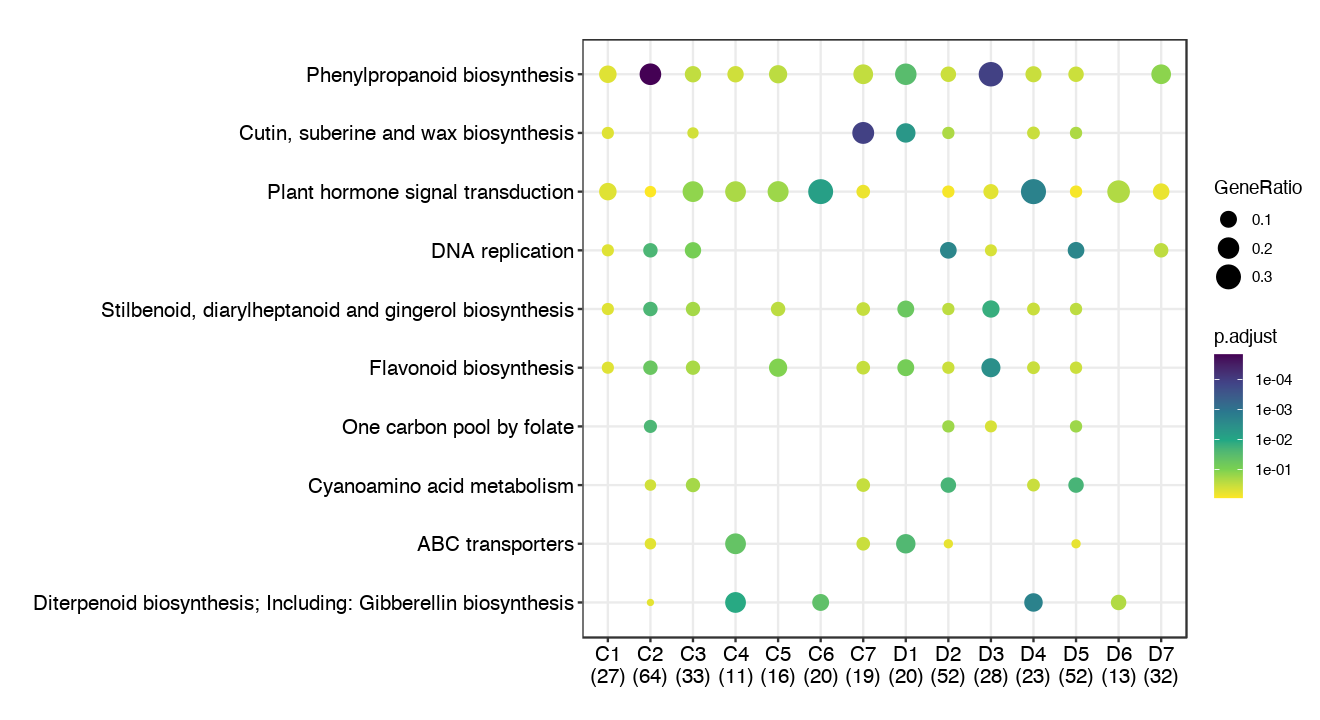

In [262]:
options(repr.plot.width=11, repr.plot.height=6)
p <- dotplot(cmp_kegg, showCategory=30,includeAll=TRUE) + 
    scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE), trans = "log10")
    #scale_color_gradient2(midpoint=0.05, 
    #                      high=muted("red"), 
    #                      low=muted("blue"), 
    #                      trans = "log10",
    #                      guide=guide_colorbar(reverse=TRUE))

ggsave(p, file="CCDD_cluster1-7_kegg_cmp.pdf", w=11,h=6)
p

In [317]:
cmp_go_cp1 <- cmp_go
cmp_go_signi_ID <- unique(subset(cmp_go@compareClusterResult, p.adjust<0.05)$ID)
cmp_go_cp1@compareClusterResult <- subset(cmp_go_cp1@compareClusterResult, cmp_go_cp1@compareClusterResult$ID %in% cmp_go_signi_ID)

cmp_go_cp1@compareClusterResult <- subset(cmp_go_cp1@compareClusterResult, ONTOLOGY %in% c("BP"))

dim(cmp_go_cp1@compareClusterResult)

[1] 1072   11

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



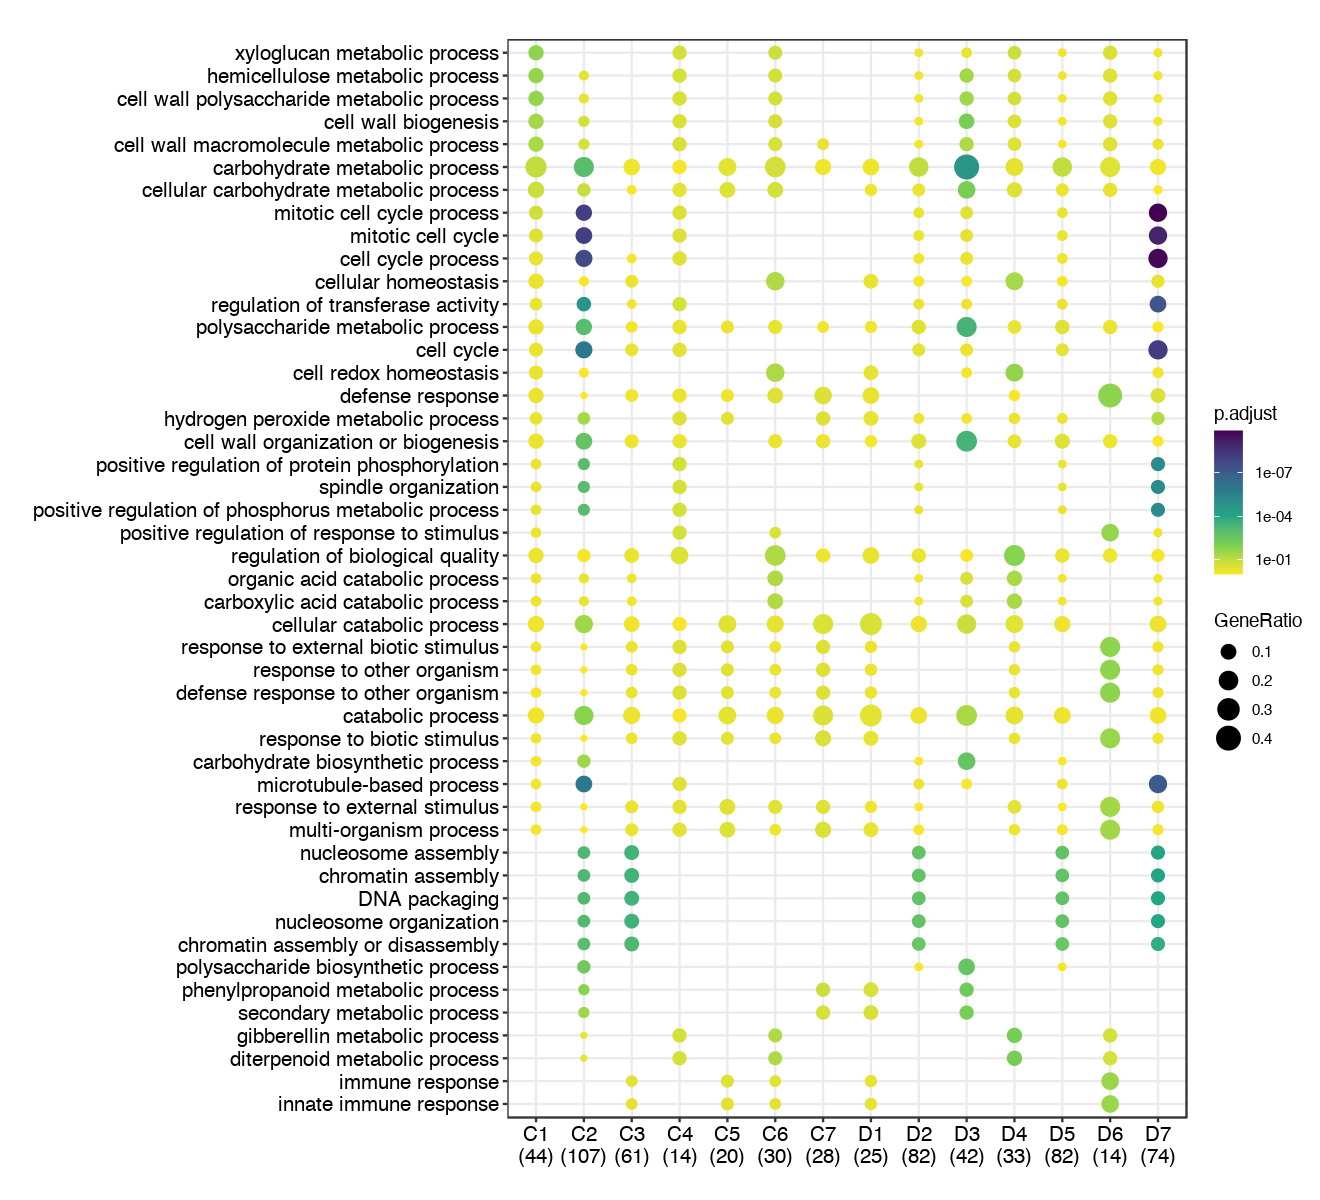

In [318]:

options(repr.plot.width=11, repr.plot.height=10)
p <- dotplot(cmp_go_cp1, showCategory=5,includeAll=TRUE) + 
    scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE), trans = "log10")
ggsave(p, file="CCDD_cluster1-7_go_cmp_BP.pdf", w=11,h=10)
p

## MF

In [319]:
cmp_go_cp2 <- cmp_go
cmp_go_signi_ID <- unique(subset(cmp_go@compareClusterResult, p.adjust<0.05)$ID)
cmp_go_cp2@compareClusterResult <- subset(cmp_go_cp2@compareClusterResult, cmp_go_cp2@compareClusterResult$ID %in% cmp_go_signi_ID)

cmp_go_cp2@compareClusterResult <- subset(cmp_go_cp2@compareClusterResult, ONTOLOGY %in% c("MF"))

dim(cmp_go_cp2@compareClusterResult)


[1] 550  11

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



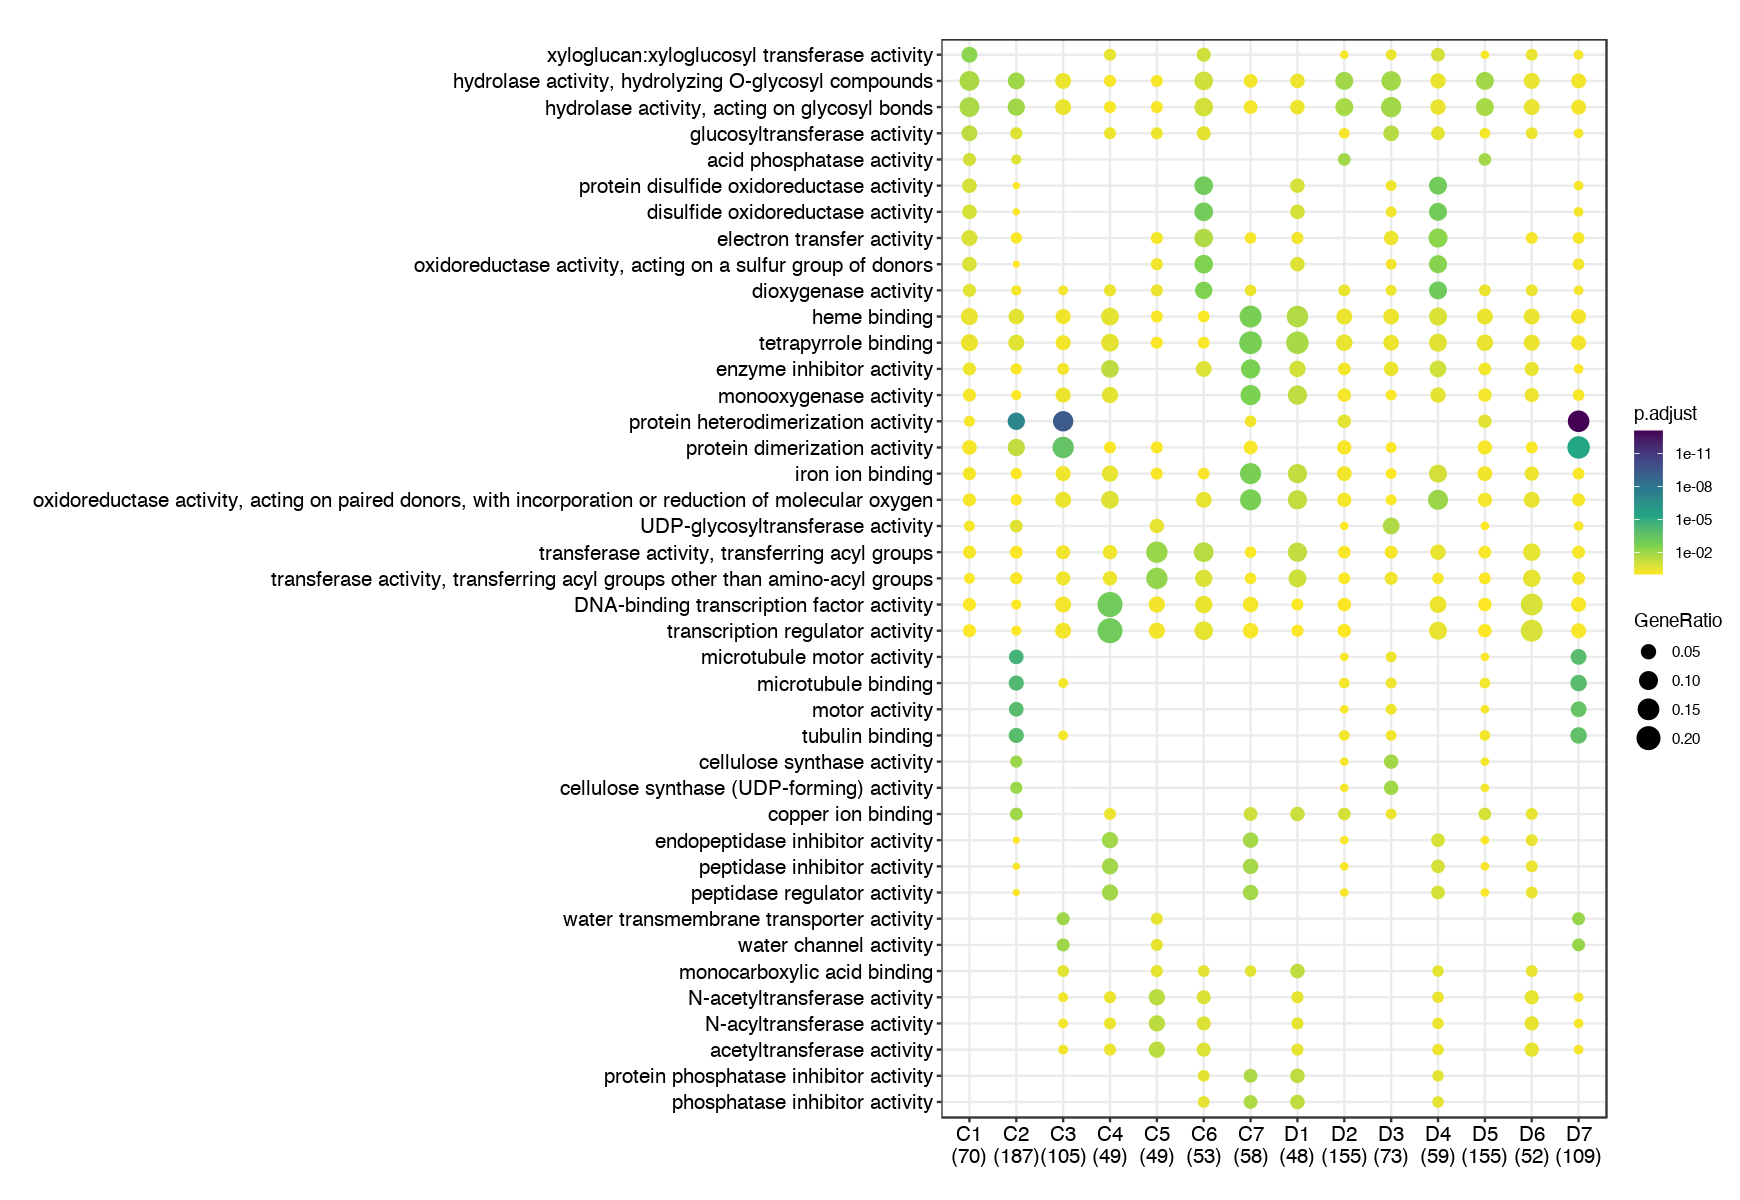

In [323]:

options(repr.plot.width=14.5, repr.plot.height=10)
p <- dotplot(cmp_go_cp2, showCategory=5,includeAll=TRUE) + 
    scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE), trans = "log10")
ggsave(p, file="CCDD_cluster1-7_go_cmp_MF.pdf", w=11,h=10)
p

In [331]:
cmp_go_cp3 <- cmp_go
cmp_go_signi_ID <- unique(subset(cmp_go@compareClusterResult, p.adjust<0.05)$ID)
cmp_go_cp3@compareClusterResult <- subset(cmp_go_cp3@compareClusterResult, cmp_go_cp3@compareClusterResult$ID %in% cmp_go_signi_ID)

cmp_go_cp3@compareClusterResult <- subset(cmp_go_cp3@compareClusterResult, ONTOLOGY %in% c("MF") & Cluster %in% c("C1", "C2", "C3", "D2", "D3", "D7"))

dim(cmp_go_cp3@compareClusterResult)


[1] 268  11

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



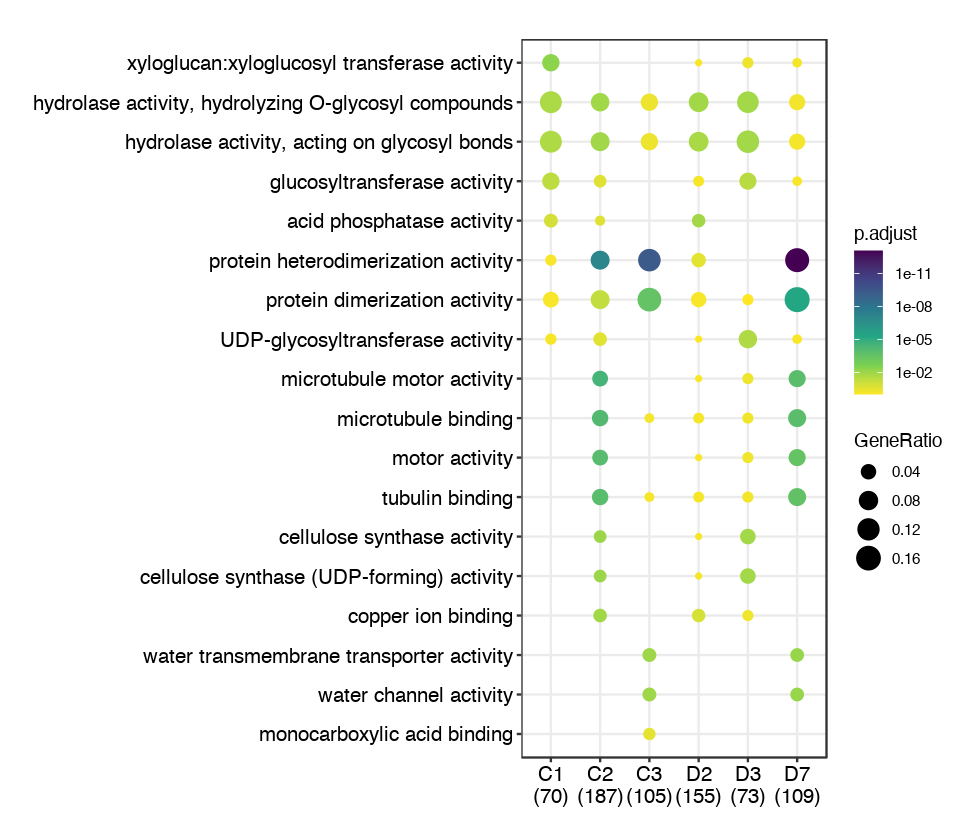

In [335]:
options(repr.plot.width=8, repr.plot.height=7)
p <- dotplot(cmp_go_cp3, showCategory=5,includeAll=TRUE) + 
    scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE), trans = "log10")
ggsave(p, file="CCDD_C123D237_go_cmp_MF.pdf", w=8,h=7)
p

[1] 638  11

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



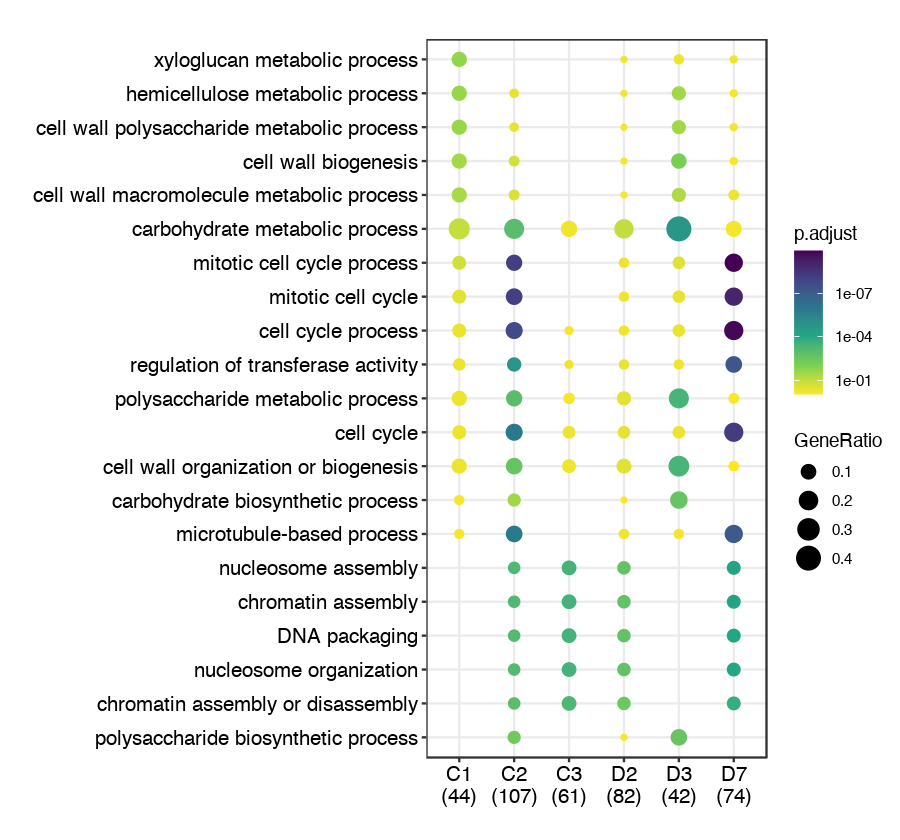

In [339]:
cmp_go_cp3 <- cmp_go
cmp_go_signi_ID <- unique(subset(cmp_go@compareClusterResult, p.adjust<0.05)$ID)
cmp_go_cp3@compareClusterResult <- subset(cmp_go_cp3@compareClusterResult, cmp_go_cp3@compareClusterResult$ID %in% cmp_go_signi_ID)

cmp_go_cp3@compareClusterResult <- subset(cmp_go_cp3@compareClusterResult, ONTOLOGY %in% c("BP") & Cluster %in% c("C1", "C2", "C3", "D2", "D3", "D7"))

dim(cmp_go_cp3@compareClusterResult)

options(repr.plot.width=7.5, repr.plot.height=7)
p <- dotplot(cmp_go_cp3, showCategory=5,includeAll=TRUE) + 
    scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE), trans = "log10")
ggsave(p, file="CCDD_C123D237_go_cmp_BP.pdf", w=7.5,h=7)
p
